In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression

In [30]:
train = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
test = pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')

In [31]:
train.dropna(inplace = True)

In [32]:

X = train.iloc[:,:-1].reset_index()
y = train.iloc[:,-1].reset_index()
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30)
X.drop('index',axis=1,inplace = True)
y.drop('index',axis= 1, inplace = True)

In [33]:
cols = X._get_numeric_data().columns
cols

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

ApplicantIncome


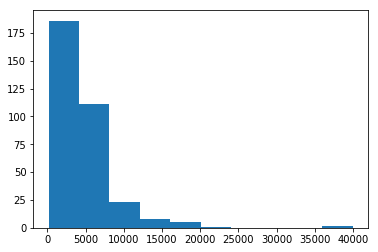

CoapplicantIncome


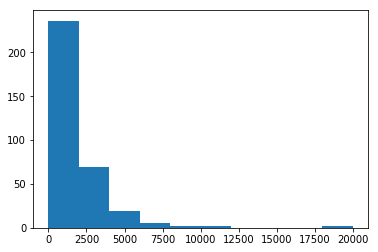

LoanAmount


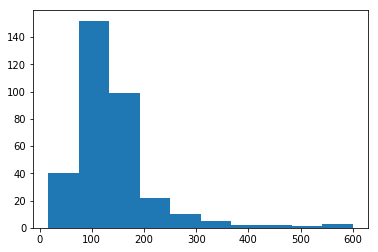

Loan_Amount_Term


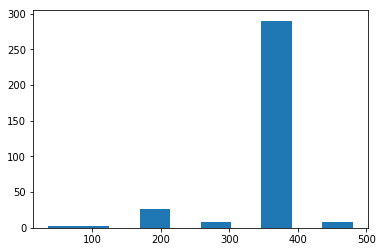

Credit_History


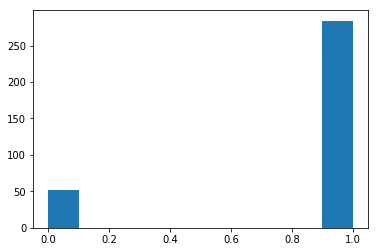

In [34]:
# visual representation
for col in cols:
    print(col)
    plt.hist(X_train[col])
    plt.show()

In [35]:
#cross validation
# score = cross_val_score(LogisticRegression(),X[cols],y,cv=5)
# score.mean()

In [36]:
from sklearn.model_selection import KFold
kf = KFold(n_splits= 9)
clf = LogisticRegression()
for train_index, test_index in kf.split(X):
    X_train,X_test = X.iloc[train_index][cols], X.iloc[test_index][cols]
    y_train,y_test = y.iloc[train_index], y.iloc[test_index]
    clf.fit(scale(X_train),y_train)
    y_pred = clf.predict(scale(X_test))
    print(accuracy_score(y_pred,y_test))

0.7592592592592593
0.8148148148148148
0.7407407407407407
0.7924528301886793
0.8301886792452831
0.7924528301886793
0.8679245283018868
0.8113207547169812
0.8679245283018868


C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:
#Logistics regression
log = LogisticRegression(penalty='l2',C=0.01)
log.fit(scale( X_train[cols]), y_train)
y_pred =  log.predict(scale(X_test[cols]))
accuracy_score(y_pred, y_test)

C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8679245283018868

In [38]:
for col in cols:
    test[col].fillna(test[col].mode()[0], inplace = True)


In [39]:
prediction = clf.predict(scale(test[cols]))

In [40]:
test_df = test.copy()

test_df['Loan_Status'] = prediction

pre = test_df[['Loan_ID','Loan_Status']]

pre.to_csv('prediction.csv', index=False)

pre[pre.Loan_Status == 'Y'].count()

Loan_ID        307
Loan_Status    307
dtype: int64

In [41]:
train[train.Loan_Status == 'Y'].count()

Loan_ID              332
Gender               332
Married              332
Dependents           332
Education            332
Self_Employed        332
ApplicantIncome      332
CoapplicantIncome    332
LoanAmount           332
Loan_Amount_Term     332
Credit_History       332
Property_Area        332
Loan_Status          332
dtype: int64